In [2]:
import numpy as np
import scipy
from findiff import FinDiff
import matplotlib.pyplot as plt

In [4]:
# Create grid
nx = 1000
x = np.linspace(-10, 10, nx)
dx = x[1] - x[0]

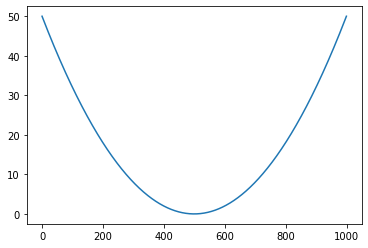

In [5]:
d2_dx2 = FinDiff(0, dx, 2, acc=2)
V = 0.5 * x**2
plt.plot(V)
plt.show()

_V = V[:]
V = scipy.sparse.diags(V)
H = - 0.5 * d2_dx2.matrix(x.shape) + V

In [18]:
energies, functions = scipy.sparse.linalg.eigs(H, which='SR', k=10)
print(energies)
states = [(energies[i], functions[:, i]) for i in range(len(energies))]

[0.49998747+0.j 1.49993737+0.j 2.49983716+0.j 3.49968685+0.j
 4.49948641+0.j 5.49923587+0.j 6.4989352 +0.j 7.4985844 +0.j
 8.49818348+0.j 9.49773243+0.j]


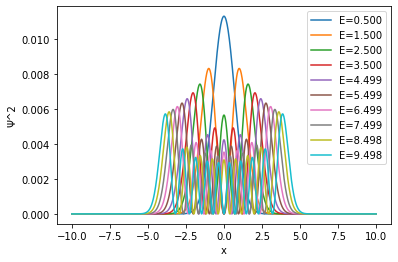

In [21]:
mag = lambda x: (x * np.conj(x)).real


for energy, psi in states:
    plt.plot(x, mag(psi), '-', label=f'E={energy.real:.3f}')

plt.ylabel('Ψ^2')
plt.xlabel('x')
plt.grid()
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
psi_0 = states[0][1]